<a href="https://colab.research.google.com/github/ThejaswaniCSE/image_processing_with_cnn/blob/main/image_processing_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

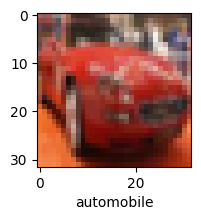

In [ ]:
plot_sample(x_train ,y_train.ravel(), 5)

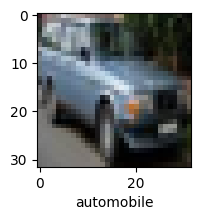

In [ ]:
plot_sample(x_train ,y_train.ravel(), 201)

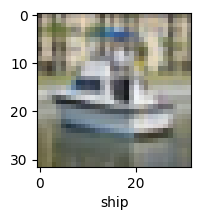

In [ ]:
plot_sample(x_train ,y_train.ravel(), 501)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8106 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.6233 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5397 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4816 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4316 - accuracy: 0.4973


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.57      0.48      0.52      1000
           1       0.48      0.73      0.58      1000
           2       0.51      0.13      0.21      1000
           3       0.32      0.44      0.37      1000
           4       0.49      0.32      0.39      1000
           5       0.48      0.26      0.34      1000
           6       0.48      0.61      0.54      1000
           7       0.61      0.44      0.51      1000
           8       0.48      0.73      0.58      1000
           9       0.44      0.56      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

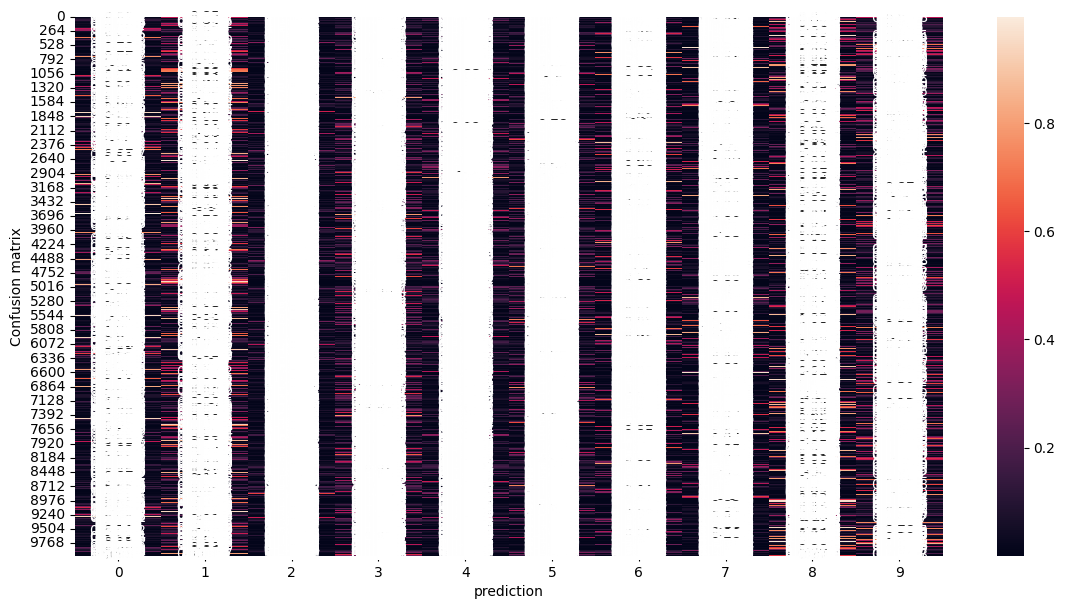

In [ ]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('prediction')
plt.ylabel('Confusion matrix')
plt.show


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
from keras.activations import relu

In [ ]:
cnn.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 107s 67ms/step - loss: 1.4710 - accuracy: 0.4707
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1200 - accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9926 - accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9068 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8443 - accuracy: 0.7066
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7847 - accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7375 - accuracy: 0.7446
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6988 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6554 - accuracy: 0.7719
Epoch 10/10
1563/1563 [==============================] - 64s 41

In [ ]:
dir(models)

['Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'clone_model',
 'experimental',
 'load_model',
 'model_from_config',
 'model_from_json',
 'model_from_yaml',
 'save_model']

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 2.3103 - accuracy: 0.0946


[2.3103106021881104, 0.09459999948740005]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[0.11109053, 0.12987703, 0.08730382, 0.08677891, 0.07870594,
        0.10431743, 0.09738208, 0.12165468, 0.08772353, 0.09516607],
       [0.11107334, 0.13721606, 0.08429004, 0.08733635, 0.06622199,
        0.09611055, 0.10129025, 0.13178371, 0.07444374, 0.11023387],
       [0.11268668, 0.1357471 , 0.0883781 , 0.08766489, 0.07027403,
        0.09514177, 0.1050774 , 0.12412624, 0.07576559, 0.10513811],
       [0.11074477, 0.13969596, 0.08333705, 0.08593402, 0.06879539,
        0.09760991, 0.10432152, 0.12560703, 0.07437174, 0.10958263],
       [0.10365905, 0.13200715, 0.08940525, 0.08983977, 0.07770922,
        0.10094516, 0.10633232, 0.12355584, 0.08195709, 0.09458921]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)


plot_sample(x_test, y_test.ravel(), 4)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
classes[y_classes[60]]

'automobile'

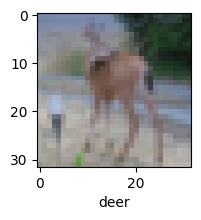

In [ ]:

plot_sample(x_test, y_test.ravel(), 100)

In [ ]:
classes[y_classes[4]]

'automobile'

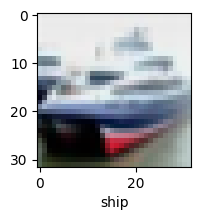

In [ ]:

plot_sample(x_test, y_test.ravel(), 1)

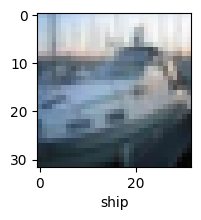

In [ ]:
plot_sample(x_test, y_test.ravel(), 2)

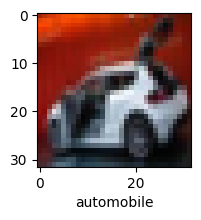

In [ ]:
plot_sample(x_test, y_test.ravel(), 6)

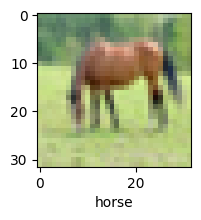

In [ ]:
plot_sample(x_test, y_test.ravel(), 60)

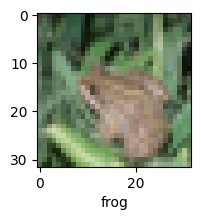

In [ ]:
plot_sample(x_test, y_test.ravel(), 4)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import keras.api._v2.keras.models as models

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
x_train.shape

(50000, 32, 32, 3)